In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
mean =  [0,0]
cov = np.array([[13 ,-3],[-3,5]])
D = np.random.multivariate_normal(mean,cov,1000)
df = pd.DataFrame(D,columns=['Attribute1','Attribute2'])
df

,Attribute1,Attribute2
0,4.302664,-0.158025
1,0.657233,2.488343
2,3.170583,-2.055586
3,-0.046904,-0.037826
4,2.670438,0.697080
...,...,...
995,-4.371438,0.860081
996,6.169054,-1.808349
997,2.491908,-2.509253
998,-0.744512,4.280280


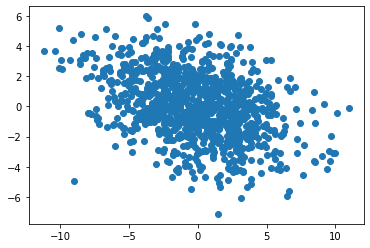

In [3]:
plt.scatter(df['Attribute1'],df['Attribute2'])
plt.show()

In [4]:
w,v = np.linalg.eig(cov)
print("Eigen values of the given square array",w)
  
print("eigenvectors of the given square array", v)

Eigen values of the given square array [14.  4.]
eigenvectors of the given square array [[ 0.9486833   0.31622777]
 [-0.31622777  0.9486833 ]]


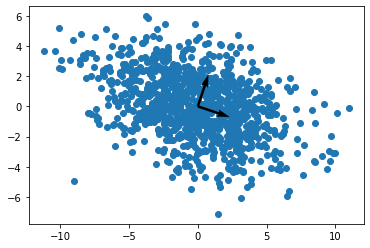

In [5]:
plt.scatter(df['Attribute1'],df['Attribute2'])
plt.quiver(v[0][0],v[1][0],scale = 10)
plt.quiver(v[0][1],v[1][1],scale = 10)
vec_1 = [v[0][0],v[1][0]]
vec_2 = [v[0][1],v[1][0]]

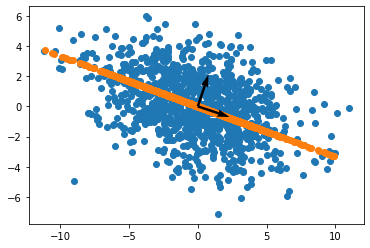

In [6]:
proj1 = []
proj2 = []
for i in range(len(df)):
    v_norm1 = np.sqrt(v[0][0]**2 + v[1][0]**2)
    v_norm2 = np.sqrt(v[0][1]**2+v[1][1]**2)
    proj1.append((np.dot(D[i],v[:,0])/v_norm1**2)*(v[:,0]))
    proj2.append((np.dot(D[i],v[:,1])/v_norm2**2)*(v[:,1]))
proj1_df = pd.DataFrame(proj1,columns=['x','y'])
proj2_df = pd.DataFrame(proj2,columns=['x','y'])
plt.scatter(df['Attribute1'],df['Attribute2'])
#plt.scatter(proj1_df['x'],proj1_df['y'])
plt.scatter(proj2_df['x'],proj2_df['y'])
plt.quiver(v[0][0],v[1][0],scale = 10)
plt.quiver(v[0][1],v[1][1],scale = 10)


In [7]:
att1 = []
att2 = []
for i in range(len(df)):
    att1.append(np.dot(D[i],v[:,0]))
    att2.append(np.dot(D[i],v[:,1]))
di = {'A':att1,'B':att2}
new_df = pd.DataFrame(di)
new_df

,A,B
0,4.131837,1.210706
1,-0.163377,2.568485
2,3.657912,-0.947474
3,-0.032535,-0.050718
4,2.312964,1.505775
...,...,...
995,-4.419092,-0.566426
996,6.424329,0.235275
997,3.157527,-1.592476
998,-2.059849,3.825195


In [8]:
col1 = []
col2 = []
for i in range(len(df)):
    col1.append(att1[i]*v[0][0]+att2[i]*v[0][1])
    col2.append(att1[i]*v[1][0]+att2[i]*v[1][1])
dii = {'Attribute1':col1,'Attribute2':col2}
D_new = pd.DataFrame(dii)
D_new

,Attribute1,Attribute2
0,4.302664,-0.158025
1,0.657233,2.488343
2,3.170583,-2.055586
3,-0.046904,-0.037826
4,2.670438,0.697080
...,...,...
995,-4.371438,0.860081
996,6.169054,-1.808349
997,2.491908,-2.509253
998,-0.744512,4.280280


In [9]:
Error =[]
cols = ['Attribute1','Attribute2']
for i in range(len(df)):
    sum = (df['Attribute1'].iloc[i]-D_new['Attribute1'].iloc[i])**2 + (df['Attribute2'].iloc[i]-D_new['Attribute2'].iloc[i])**2
    Error.append(sum**0.5)
(np.array(Error)).mean()

2.9260042669644645e-16